In [1]:
# install packages
%pip install keras
%pip install tensorflow --upgrade

     |████████████████████████████████| 462 kB 4.3 MB/s 


In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.optimizers import gradient_descent_v2
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report

##1.Data cleaning 

The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’. Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below. Remember to use the same pipeline for both datasets.


*   All emojis are removed.
*   All URLs are removed.
*   All characters in the text are in lowercase.
*   All stop words are removed. Be clear in what you consider as a stop word.
*   All punctuations are removed.







Import csv files used in the analysis.

In [3]:
# import data
df_sentiment = pd.read_csv('sentiment_analysis.csv')
df_election=  pd.read_csv('Canadian_elections_2021.csv')

The sentiment analysis dataset is presented as below:

In [4]:
df_sentiment.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1


The Canadian election 2021 dataset is presented as below:

In [5]:
df_election.head()

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN


In order to perform data cleaning, the below steps are followed to remove all emojis, URLs, change characters in the text to lowercase, remove all stop words and punctuations. 

a) All emojis are removed.

In [6]:
# remove emojis
df_sentiment = df_sentiment.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_election = df_election.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# Reference: https://dev.to/sahilfruitwala/data-cleaning-101-3nj1

sentiment dataset after emojis removed:

In [7]:
df_sentiment.head()

,ID,text,label
0,7.68098e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.68098e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.68098e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.68098e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.68098e+17,RT @CedricFeschotte: Excited to announce: as o...,1


election dataset after emojis removed:

In [8]:
df_election.head()

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,nan
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,nan


b) All URLs are removed.

In [9]:
# remove all URLs
df_sentiment['text'] = df_sentiment.apply(lambda x: re.sub(r'http\S+', '', x['text']), axis = 1)
df_election['text'] = df_election.apply(lambda x: re.sub(r'http\S+', '', x['text']), axis = 1)

sentiment dataset after URLs removed:

In [10]:
df_sentiment.head()

,ID,text,label
0,7.68098e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.68098e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.68098e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.68098e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.68098e+17,RT @CedricFeschotte: Excited to announce: as o...,1


election dataset after URLs removed:

In [11]:
df_election.head()

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,nan
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,nan


c) All characters in the text are in lowercase.

In [12]:
# change all characters in the text to lowercase
df_sentiment['text'] = df_sentiment.apply(lambda x: x['text'].lower(), axis=1)
df_election['text'] = df_election.apply(lambda x: x['text'].lower(), axis=1)

sentiment dataset after all characters in the text are in lowercase:

In [13]:
df_sentiment.head()

,ID,text,label
0,7.68098e+17,josh jenkins is looking forward to tab breeder...,1
1,7.68098e+17,rt @mianusmanjaved: congratulations pakistan o...,1
2,7.68098e+17,"rt @pepalerts: this september, @yesmag is taki...",1
3,7.68098e+17,"rt @david_gaibis: newly painted walls, thanks ...",1
4,7.68098e+17,rt @cedricfeschotte: excited to announce: as o...,1


election dataset after all characters in the text are in lowercase:

In [14]:
df_election.head()

,text,sentiment,negative_reason
0,the canadian election is a power grab by pm tr...,negative,calling election early
1,i do hope trudeau loses the canadian election ...,negative,covid
2,"dear canadians, this election is a test of how...",positive,nan
3,canadian friends: never forget that trudeau ha...,negative,calling election early
4,sorry @thejagmeetsingh i have voted #ndp all m...,positive,nan


d) All stop words are removed. Be clear in what you consider as a stop word.

In [15]:
# stop words downloaded from nltk package
nltk.download('stopwords')
def_stopwords = set(stopwords.words('english'))
print(def_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'for', 'i', 'whom', "hadn't", 'don', 'we', 'its', 'further', 'does', 'hadn', 'hasn', 't', 'these', 'some', 'up', 'own', 'when', 'about', 'before', 'such', "couldn't", 'he', 'theirs', 'but', 'd', 'shan', 'o', 'didn', 'over', 'until', 'no', "should've", "won't", "haven't", 'below', 'can', 'out', 'off', 'very', 'this', 'through', 'wouldn', "didn't", 'with', "shan't", 've', 'most', "you're", 'needn', 'between', 'ma', 'ain', 'than', 'weren', 'won', 'other', 'why', 'is', "you'll", "mightn't", 'had', 'should', 'that', 'and', 'who', 'there', 'was', 'having', 's', 'under', "isn't", 'each', 'our', 'ourselves', 'doesn', 'my', "weren't", 'both', 'were', 'has', 'or', 'wasn', 'yours', 'being', 'yourselves', 'above', 'where', 'an', 'your', 'nor', 'haven', 'am', 'if', 'those', 'into', "you'd", 'a', 'same', 'too', 'here', 'will', 'once', "needn't", "aren't", 'him', 'during', 'what', 'of', 'sh

In [16]:
# remove all stop words
df_sentiment['text']= df_sentiment['text'].apply(lambda x: ' '.join([w for w in x.split() if w not in (def_stopwords)]))
df_election['text']= df_election['text'].apply(lambda x: ' '.join([w for w in x.split() if w not in (def_stopwords)]))
# Reference: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

sentiment dataset after all stop words are removed:

In [17]:
df_sentiment.head()

,ID,text,label
0,7.68098e+17,josh jenkins looking forward tab breeders crow...,1
1,7.68098e+17,rt @mianusmanjaved: congratulations pakistan b...,1
2,7.68098e+17,"rt @pepalerts: september, @yesmag taking maine...",1
3,7.68098e+17,"rt @david_gaibis: newly painted walls, thanks ...",1
4,7.68098e+17,rt @cedricfeschotte: excited announce: july 20...,1


election dataset after all stop words are removed:

In [18]:
df_election.head()

,text,sentiment,negative_reason
0,"canadian election power grab pm trudeau, yes -...",negative,calling election early
1,hope trudeau loses canadian election tomorrow ...,negative,covid
2,"dear canadians, election test progressive are....",positive,nan
3,canadian friends: never forget trudeau 2 years...,negative,calling election early
4,sorry @thejagmeetsingh voted #ndp life electio...,positive,nan


Count for keywords and frequency of hashtag at this step before punctuations are removed to prepare for the exploratory analysis part:

In [19]:
# count for keywords of hashtag
hashtag_count = df_election['text'].str.extractall(r'(\#\w+)')[0].value_counts()
print(hashtag_count)

#elxn44                   116
#cdnpoli                   86
#nevervoteconservative     51
#voteppc                   46
#voteliberal               38
                         ... 
#democracy                  1
#rightwing                  1
#bluejays                   1
#voteabc                    1
#wakeup                     1
Name: 0, Length: 278, dtype: int64


e) All punctuations are removed.

In [20]:
# find punctuations from built-in package
def_punctuation = string.punctuation
print(def_punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
# remove all punctuations
df_sentiment['text']= df_sentiment['text'].apply(lambda x:''.join([i for i in x if i not in def_punctuation]))
df_election['text']= df_election['text'].apply(lambda x:''.join([i for i in x if i not in def_punctuation]))
# Reference: https://stackoverflow.com/questions/33047818/remove-punctuation-for-each-row-in-a-pandas-data-frame

sentiment dataset after all punctuations are removed:

In [22]:
df_sentiment

,ID,text,label
0,7.68098e+17,josh jenkins looking forward tab breeders crow...,1
1,7.68098e+17,rt mianusmanjaved congratulations pakistan bec...,1
2,7.68098e+17,rt pepalerts september yesmag taking maine men...,1
3,7.68098e+17,rt davidgaibis newly painted walls thanks mill...,1
4,7.68098e+17,rt cedricfeschotte excited announce july 2017 ...,1
...,...,...,...
550386,8.04617e+17,goddesseso cant stop watching hermm more,0
550387,8.04618e+17,poor old tom odell look like would know wrong ...,0
550388,8.04618e+17,antsmasher smashed 7 ants awesome gamehjfjfi,1
550389,8.04618e+17,lizhudston kymwyllie evasmiless meanbok linddy...,1


election dataset after all punctuations are removed:

In [23]:
df_election.head()

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes t...,negative,calling election early
1,hope trudeau loses canadian election tomorrow ...,negative,covid
2,dear canadians election test progressive are w...,positive,nan
3,canadian friends never forget trudeau 2 years ...,negative,calling election early
4,sorry thejagmeetsingh voted ndp life election ...,positive,nan


##2. Exploratory analysis

Design a procedure that determines the political party (Liberal, Conservative, New Democratic Party (NDP), The People's Party of Canada (PPC)) of a given tweet and apply this procedure to all the tweets in the Canadian Elections dataset. A suggestion would be to look at and count relevant words and hashtags in the tweets that identify to certain political parties or candidates. What can you say about the distribution of the political affiliations of the tweets? (hint: you may wish to extract the key words before removing the punctuations in Part 1.)

To find keywords of hashtags that are relevant to each political party, the top 70 hashtags have been presented as below to look for relevant keywords of the four parties:

In [24]:
# top 30 hashtags
hashtag_count[0:29]

#elxn44                   116
#cdnpoli                   86
#nevervoteconservative     51
#voteppc                   46
#voteliberal               38
#istandwithtrudeau         24
#otoole                    21
#ppc                       16
#elections2021             15
#canada                    12
#voteliberalmajority       11
#forwardforeveryone        10
#nevervotecpc              10
#voteppc2021                9
#canadaelection             9
#canadianelection           8
#leadersdebate              7
#votetrudeauout             7
#ndp                        7
#liberalmajority            7
#conservative               6
#debatdeschefs              6
#trudeau                    6
#otooleforpm                6
#polcan                     5
#cpc                        5
#maximebernier              5
#purplewave                 5
#onpoli                     5
Name: 0, dtype: int64

In [25]:
# top 31-70 hashtags
hashtag_count[30:69]

#election2021            5
#canadians               4
#covid19                 4
#justintrudeau           4
#voteconservative        4
#debate2021              4
#vote                    4
#climatechange           3
#_                       3
#maximebernierforpm      3
#votendp                 3
#debate                  3
#trudeaucrimeminister    3
#trudeaumustgo           3
#makemaxourpm            3
#election                3
#elexn44                 3
#ndp2021                 3
#canadian                3
#freedom                 3
#cdnmedia                3
#gettheshot              2
#elxn2021                2
#conservatives           2
#readyforbetter          2
#2tierotoole             2
#elxn44vote              2
#voteforhumanrights      2
#abpoli                  2
#singh                   2
#liberals                2
#debatsdeschefs          2
#canadavotes             2
#morocco                 2
#securethefuture         2
#hypocrite               2
#india                   2
#

Keywords which belong to different parties have been found and are presented as below. If some of the tweets contain different keywords taht belong to different parties, the algorithm is to count the number of keywords belongs to each party and compare the number under different parties and then use the party which have the maximum number of counts. If a tweet could not find any relevant keywords of the four parties, an N/A will be assigned to it. The party is determined and presented as below: 

In [26]:
# empty list 
political_party = []
party_list = []

# count of keywords
Liberal_keywords = df_election['text'].str.count('voteliberal|istandwithtrudeau|voteliberalmajority|liberalmajority|trudeau|justintrudeau|liberals')
Conservative_keywords = df_election['text'].str.count('otoole|conservative|voteconservative|otooleforpm|cpc|conservatives')
NDP_keywords = df_election['text'].str.count('ndp|votendp|ndp2021|singh')
PPC_keywords = df_election['text'].str.count('voteppc|ppc|voteppc2021|maximebernier|maximebernierforpm|makemaxourpm')

# when a tweets could relate to more than 1 parties
# the party will be decided by relate the hashtags to different parties, and find which party has the most hashtags
for i in range(len(df_election['text'])):
  party_list.append(max(Liberal_keywords[i], Conservative_keywords[i], NDP_keywords[i], PPC_keywords[i]))

# define party
for j in range(len(party_list)):
  if party_list[j] == 0:
    political_party.append('N/A') # does not find relevant to any party by the hashtag keywords
  elif party_list[j] == Liberal_keywords[j]:
    political_party.append('Liberal')
  elif party_list[j] == Conservative_keywords[j]:
    political_party.append('Conservative')
  elif party_list[j] == NDP_keywords[j]:
    political_party.append('NDP')
  elif party_list[j] == PPC_keywords[j]:
    political_party.append('PPC')

 
# result
political_party

['Liberal',
 'Liberal',
 'N/A',
 'Liberal',
 'PPC',
 'Conservative',
 'N/A',
 'N/A',
 'PPC',
 'Liberal',
 'Conservative',
 'Conservative',
 'N/A',
 'N/A',
 'N/A',
 'Conservative',
 'Conservative',
 'N/A',
 'PPC',
 'PPC',
 'Liberal',
 'Liberal',
 'Liberal',
 'Conservative',
 'Conservative',
 'N/A',
 'Conservative',
 'Conservative',
 'Liberal',
 'Liberal',
 'Conservative',
 'PPC',
 'Liberal',
 'Liberal',
 'N/A',
 'Conservative',
 'Conservative',
 'NDP',
 'Conservative',
 'Liberal',
 'Conservative',
 'Conservative',
 'N/A',
 'Liberal',
 'N/A',
 'Conservative',
 'N/A',
 'N/A',
 'PPC',
 'Liberal',
 'Liberal',
 'Conservative',
 'Liberal',
 'Conservative',
 'N/A',
 'Liberal',
 'Conservative',
 'NDP',
 'Conservative',
 'NDP',
 'N/A',
 'NDP',
 'Conservative',
 'Conservative',
 'Liberal',
 'Conservative',
 'Conservative',
 'Liberal',
 'Liberal',
 'N/A',
 'Conservative',
 'N/A',
 'N/A',
 'Liberal',
 'Conservative',
 'Liberal',
 'Liberal',
 'N/A',
 'Liberal',
 'Liberal',
 'Liberal',
 'Liberal',
 '

Add the political party as a new column to the election dataset.

In [27]:
# add political party column to the election dataframe
df_election['political_party'] = political_party
df_election

,text,sentiment,negative_reason,political_party
0,canadian election power grab pm trudeau yes t...,negative,calling election early,Liberal
1,hope trudeau loses canadian election tomorrow ...,negative,covid,Liberal
2,dear canadians election test progressive are w...,positive,nan,N/A
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,Liberal
4,sorry thejagmeetsingh voted ndp life election ...,positive,nan,PPC
...,...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others,N/A
998,davidakin trudeau imposes gun control policies...,negative,gun control,Liberal
999,canada election stolen thugs uneducated goons ...,negative,others,N/A
1000,otoole amends platform gun control questions r...,negative,tell lies,Conservative


The distribution of tweets of different parties:

In [28]:
# distribution of different political parties
political_party_distribute = pd.DataFrame(df_election['political_party'].value_counts())
political_party_distribute

,political_party
Liberal,400
Conservative,264
N/A,254
PPC,55
NDP,29


Plot the distribution of the political party of the tweets.

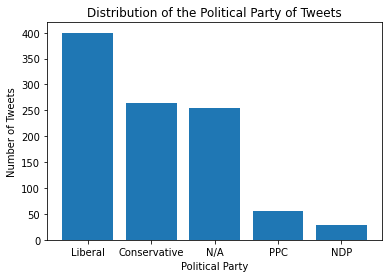

In [29]:
# plot
plt.bar(political_party_distribute.index, political_party_distribute.political_party)
plt.title('Distribution of the Political Party of Tweets')
plt.xlabel("Political Party")
plt.ylabel("Number of Tweets")
plt.show()

From distribution of the political party of tweets, it could be seen that most tweets are still belongs to Liberal, with the number of Conservative a little bit lower than Liberal, while PPC and NDP are significantly lower. The tweets results show that the most popular parties are Liberal and Conservative.

Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc.) that visualizes some aspect of the generic tweets in sentiment_analysis.csv and another figure for the 2021 Canadian Elections tweets. All graphs and plots should be readable and have all axes that are appropriately labelled. Discuss your findings.

Word cloud of sentiment dataset:

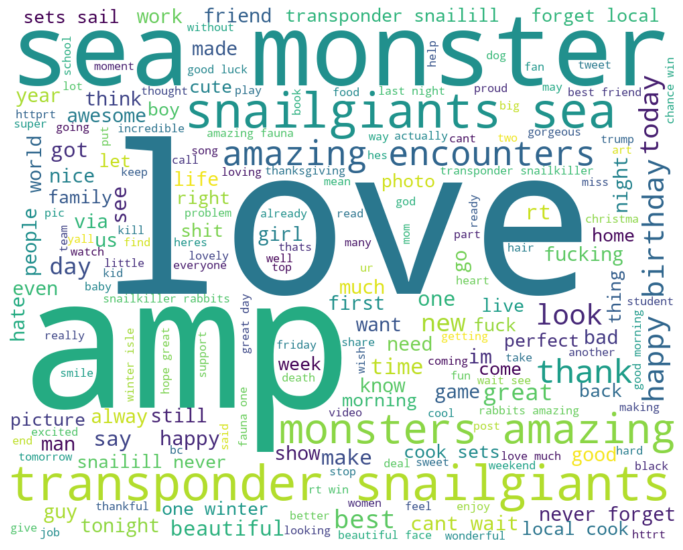

In [30]:
# sentiment dataset word cloud
text = df_sentiment['text'].ravel()
text = pd.Series(text).str.cat(sep='')
wordcloud = WordCloud(width=1000, height=800, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the word cloud of the sentiment dataset above, it shows that the words 'love', 'amp', 'sea', 'monster', 'snailgiants' and 'transponder' have relatively large word size which indicate high word frequency. This shows both negative and positive words are mentioned often in the tweets.

Word cloud of election dataset:

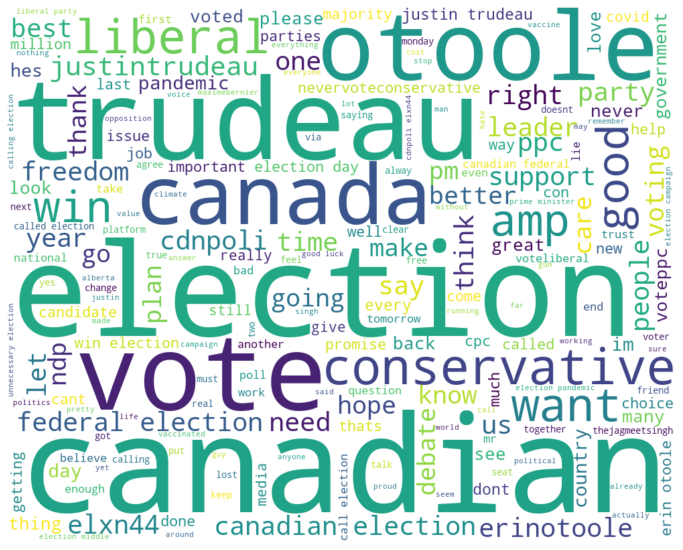

In [31]:
# Canadian Elections
text = df_election['text'].ravel()
text = pd.Series(text).str.cat(sep='')
wordcloud = WordCloud(width=1000, height=800, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the word cloud of the election dataset above, it shows that the words 'canadian', 'election', 'trudeau', 'otoole', 'vote', 'canada', 'conservative' and 'liberal' have relatively large word size which indicate high word frequency. This also implies people were most interested in discussing about the liberal and conservative parties, which corresponds to the findings in previous section.

##3. Sentiment Classification - Model implementation and tuning

### a) Machine learning models:

Split the generic tweets randomly into training data (80%) and test data (20%)

The sentiment dataset are split to training set and test set:

In [32]:
# define X and y
X = df_sentiment['text'].copy()
y = df_sentiment['label'].astype('int').copy()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Prepare the data using TF-IDF. You may set max_features = 5000 to keep the
computation time manageable. (hint: be careful regarding which dataset to fit the
TF-IDF model on.)

In [34]:
# TF-IDF
tf_idf = TfidfVectorizer(max_features = 5000)

# fit TF-IDF model
X_train_tf_idf = tf_idf.fit_transform(X_train)
X_test_tf_idf = tf_idf.transform(X_test)

Train seven classification algorithms on the training data from generic tweets: logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest, and XGBoost, where each tweet is considered a single observation/example, and the target variable is the sentiment value, which is either positive or negative.

Evaluate each model on the test data in generic tweets dataset to obtain an accuracy value.

Train logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest, and XGBoost on the training data and obtain the accuracy value on the test data:

Logistic regression:

In [35]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

In [36]:
# fit logistic regression model
logit_tf_idf= LogisticRegression()
logit_tf_idf.fit(X_train_tf_idf,y_train)

# prediction on test set
pred_logit_tf_idf = logit_tf_idf.predict(X_test_tf_idf)

# accuracy score
score_logit_tf_idf = accuracy_score(y_test,pred_logit_tf_idf)
print ('Accuracy score of TF-IDF of logistic regression on test data is',score_logit_tf_idf*100, '%')

Accuracy score of TF-IDF of logistic regression on test data is 96.55520126454637 %


k-NN:

In [37]:
# fit knn model
knn_tf_idf = KNeighborsClassifier()
knn_tf_idf.fit(X_train_tf_idf,y_train)

# prediction on test set
pred_knn_tf_idf = knn_tf_idf.predict(X_test_tf_idf)

# accuracy score
score_knn_tf_idf_test = accuracy_score(y_test,pred_knn_tf_idf)
print ('Accuracy score of TF-IDF of k-nn on test data is',score_knn_tf_idf_test*100, '%')

Accuracy score of TF-IDF of k-nn on test data is 80.1951325865969 %


Naive Bayes:

In [38]:
# fit Naive Bayes
NB_tf_idf = MultinomialNB()
NB_tf_idf.fit(X_train_tf_idf, y_train)

# prediction on test set
pred_NB_tf_idf= NB_tf_idf.predict(X_test_tf_idf)

# accuracy score
score_NB_tf_idf = accuracy_score(y_test,pred_NB_tf_idf)
print ('Accuracy score of TF-IDF of naive bayes on test data is',score_NB_tf_idf*100, '%')

Accuracy score of TF-IDF of naive bayes on test data is 92.67798581019086 %


SVM：

In [39]:
# fit SVM
SVM_tf_idf = LinearSVC()
SVM_tf_idf.fit(X_train_tf_idf, y_train)

# prediction on test set
pred_SVM_tf_idf= SVM_tf_idf.predict(X_test_tf_idf)

# accuracy score
score_SVM_tf_idf = accuracy_score(y_test,pred_SVM_tf_idf)
print ('Accuracy score of TF-IDF of SVM on test data is',score_SVM_tf_idf*100, '%')

Accuracy score of TF-IDF of SVM on test data is 96.58154598061392 %


Decision trees:

In [40]:
# fit decision trees
DT_tf_idf = DecisionTreeClassifier(random_state=0)
DT_tf_idf.fit(X_train_tf_idf, y_train)

# prediction on test set
pred_DT_tf_idf= DT_tf_idf.predict(X_test_tf_idf)

# accuracy score
score_DT_tf_idf = accuracy_score(y_test,pred_DT_tf_idf)
print ('Accuracy score of TF-IDF of decision tree on test data is',score_DT_tf_idf*100, '%')

Accuracy score of TF-IDF of decision tree on test data is 94.2023455881685 %


Random Forest:

In [41]:
# fit Random Forest
RF_tf_idf = RandomForestClassifier(random_state=0, max_depth = 50)
RF_tf_idf.fit(X_train_tf_idf, y_train)

# prediction on test set
pred_RF_tf_idf= RF_tf_idf.predict(X_test_tf_idf)

# accuracy score
score_RF_tf_idf = accuracy_score(y_test,pred_RF_tf_idf)
print ('Accuracy score of TF-IDF of random forest on test data is',score_RF_tf_idf*100, '%')

Accuracy score of TF-IDF of random forest on test data is 84.37213274103144 %


XGBoost:

In [42]:
# fit XGBoost
XGB_tf_idf = xgb.XGBClassifier()
XGB_tf_idf.fit(X_train_tf_idf, y_train)

# prediction on test set
pred_XGB_tf_idf= XGB_tf_idf.predict(X_test_tf_idf)

# accuracy score
score_XGB_tf_idf = accuracy_score(y_test,pred_XGB_tf_idf)
print ('Accuracy score of TF-IDF of XGBoost on test data is',score_XGB_tf_idf*100, '%')

Accuracy score of TF-IDF of XGBoost on test data is 85.96008321296523 %


Among all these seven machine learning algorithms, after preparing data using TF-IDF, the SVM has the highest accuracy.

###b) Deep learning model: 

Split the generic tweets into training data (60%), validation data (20%) and test
data (20%).

In [43]:
# define X and y
X = df_sentiment['text'].copy()
y = df_sentiment['label'].astype('int').copy()

In [44]:
# train test split
X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size=0.6, random_state=0)
X_validation, X_test, y_validation, y_test = train_test_split(X_rest, y_rest, train_size=0.5, random_state=0)

Prepare the data using Bag of Words (word frequency). You may set max_features = 5000 to keep the computation time manageable. (hint: be careful regarding which dataset to fit the Bag of Words model on.)

In [45]:
# Bag of Words
bag_of_words = CountVectorizer(max_features = 500) # my google colab cannot afford max_feature of 5000

# fit and transform the train, validation and test set
X_train_bag_of_words = bag_of_words.fit_transform(X_train)
X_validation_bag_of_words = bag_of_words.transform(X_validation)
X_test_bag_of_words = bag_of_words.transform(X_test)

# change data type to use in the deep learning model
X_train_bag_of_words = X_train_bag_of_words.todense()
X_validation_bag_of_words = X_validation_bag_of_words.todense()
X_test_bag_of_words = X_test_bag_of_words.todense()

Define and train a deep learning model to perform the sentiment classification task. There is no specific model architecture required.

A deep learning model is defined and trained as below:

In [46]:
# deep learning model
model = Sequential()

# add layers
model.add(Dense(units=8, input_shape=(500, ), 
                kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model on training
history = model.fit(X_train_bag_of_words, y_train, epochs=10, batch_size = 20)
history

# Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Epoch 1/10
16512/16512 [==============================] - 25s 1ms/step - loss: 0.2200 - accuracy: 0.9146
Epoch 2/10
16512/16512 [==============================] - 24s 1ms/step - loss: 0.1922 - accuracy: 0.9213
Epoch 3/10
16512/16512 [==============================] - 25s 1ms/step - loss: 0.1886 - accuracy: 0.9223
Epoch 4/10
16512/16512 [==============================] - 24s 1ms/step - loss: 0.1859 - accuracy: 0.9232
Epoch 5/10
16512/16512 [==============================] - 24s 1ms/step - loss: 0.1836 - accuracy: 0.9241
Epoch 6/10
16512/16512 [==============================] - 24s 1ms/step - loss: 0.1819 - accuracy: 0.9249
Epoch 7/10
16512/16512 [==============================] - 24s 1ms/step - loss: 0.1805 - accuracy: 0.9253
Epoch 8/10
16512/16512 [==============================] - 24s 1ms/step - loss: 0.1795 - accuracy: 0.9256
Epoch 9/10
16512/16512 [==============================] - 25s 1ms/step - loss: 0.1789 - accuracy: 0.9257
Epoch 10/10
16512/16512 [==============================

Tune two hyperparameters of the deep learning model using grid search.

Batch and epochs are two hyperparameters tuned using grid search as below:

In [47]:
# set seeds
seed = 10
np.random.seed(seed)

# define build model, required for KerasClassifier
def build_model(optimizer='adam'):
    # create model
    model = Sequential()
    # add layers
    model.add(Dense(units=8, input_shape=(500, ), 
                    kernel_initializer='uniform', activation='relu'))
    model.add(Dense(units=4, activation='relu'))
    model.add(Dense(units=2, activation='sigmoid'))
    model.add(Dense(units=1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', 
                       optimizer=optimizer, 
                       metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=build_model)

# grid search hyper parameter options and dictionary
batch_size = [10, 20]
epochs = [5, 10]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, cv=3)
grid_result = grid.fit(X_validation_bag_of_words, y_validation)

# result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Reference: https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

Epoch 1/10
11008/11008 [==============================] - 17s 1ms/step - loss: 0.2631 - accuracy: 0.8963
Epoch 2/10
11008/11008 [==============================] - 16s 1ms/step - loss: 0.2010 - accuracy: 0.9190
Epoch 3/10
11008/11008 [==============================] - 17s 2ms/step - loss: 0.1956 - accuracy: 0.9193
Epoch 4/10
11008/11008 [==============================] - 16s 1ms/step - loss: 0.1924 - accuracy: 0.9205
Epoch 5/10
11008/11008 [==============================] - 17s 2ms/step - loss: 0.1891 - accuracy: 0.9209
Epoch 6/10
11008/11008 [==============================] - 16s 1ms/step - loss: 0.1859 - accuracy: 0.9219
Epoch 7/10
11008/11008 [==============================] - 16s 1ms/step - loss: 0.1839 - accuracy: 0.9226
Epoch 8/10
11008/11008 [==============================] - 16s 1ms/step - loss: 0.1814 - accuracy: 0.9239
Epoch 9/10
11008/11008 [==============================] - 16s 1ms/step - loss: 0.1798 - accuracy: 0.9249
Epoch 10/10
11008/11008 [==============================

From the grid search result, the best model has batch size 10 and epochs 10, and this is selected as the best model to evaluate on test data.

Evaluate the best model on the test data in generic tweets dataset to obtain an
accuracy value.

In [48]:
# deep learning model
model = Sequential()

# add layers
model.add(Dense(units=8, input_shape=(500, ), 
                kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the best model
best_model = model.fit(X_train_bag_of_words, y_train, epochs=10, batch_size =10)

Epoch 1/10
33024/33024 [==============================] - 50s 1ms/step - loss: 0.2207 - accuracy: 0.9128
Epoch 2/10
33024/33024 [==============================] - 49s 1ms/step - loss: 0.1909 - accuracy: 0.9224
Epoch 3/10
33024/33024 [==============================] - 50s 2ms/step - loss: 0.1865 - accuracy: 0.9239
Epoch 4/10
33024/33024 [==============================] - 49s 1ms/step - loss: 0.1840 - accuracy: 0.9249
Epoch 5/10
33024/33024 [==============================] - 51s 2ms/step - loss: 0.1826 - accuracy: 0.9254
Epoch 6/10
33024/33024 [==============================] - 49s 1ms/step - loss: 0.1817 - accuracy: 0.9257
Epoch 7/10
33024/33024 [==============================] - 49s 1ms/step - loss: 0.1810 - accuracy: 0.9262
Epoch 8/10
33024/33024 [==============================] - 49s 1ms/step - loss: 0.1806 - accuracy: 0.9266
Epoch 9/10
33024/33024 [==============================] - 49s 1ms/step - loss: 0.1802 - accuracy: 0.9268
Epoch 10/10
33024/33024 [==============================

In [49]:
# predict test
pred_test_bag_of_words = model.predict(X_test_bag_of_words).astype('int')

# accuracy score
print ('Accuracy score of the best model on test data is',accuracy_score(y_test, pred_test_bag_of_words)*100, '%')

Accuracy score of the best model on test data is 32.612033176173476 %


###c) Evaluate the best model on the test data in generic tweets dataset to obtain an accuracy value.

election dataset:

In [50]:
df_election.head()

,text,sentiment,negative_reason,political_party
0,canadian election power grab pm trudeau yes t...,negative,calling election early,Liberal
1,hope trudeau loses canadian election tomorrow ...,negative,covid,Liberal
2,dear canadians election test progressive are w...,positive,nan,N/A
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,Liberal
4,sorry thejagmeetsingh voted ndp life election ...,positive,nan,PPC


Encode the sentiment column to prepare for the prediction:

In [51]:
# encode df_election's sentiment column, negative is 0, positive is 1
encode = LabelEncoder()
df_election['sentiment'] = encode.fit_transform(df_election['sentiment']) 

election dataset after encoding:

In [52]:
# dataset
df_election.head()

,text,sentiment,negative_reason,political_party
0,canadian election power grab pm trudeau yes t...,0,calling election early,Liberal
1,hope trudeau loses canadian election tomorrow ...,0,covid,Liberal
2,dear canadians election test progressive are w...,1,nan,N/A
3,canadian friends never forget trudeau 2 years ...,0,calling election early,Liberal
4,sorry thejagmeetsingh voted ndp life election ...,1,nan,PPC


The best model among all models from part a and b is the SVM model, so SVM is used here to predict the election dataset:

In [53]:
# define X and y
X_election = df_election['text'].copy()
y_election = df_election['sentiment'].astype('int').copy()

In [54]:
# fit TF-IDF model
X_election_tf_idf = tf_idf.transform(X_election)

In [55]:
# prediction on test set
pred_election_SVM_tf_idf= SVM_tf_idf.predict(X_election_tf_idf)

# accuracy score
score_election_SVM_tf_idf = accuracy_score(y_election,pred_election_SVM_tf_idf)
print ('Accuracy score of TF-IDF of SVM on Canadian Elections data is',score_election_SVM_tf_idf*100, '%')

Accuracy score of TF-IDF of SVM on Canadian Elections data is 70.85828343313374 %


The accuracy score below shows quite good match of  predictions and the sentiment labelled in the Canadian elections data.

###d) Propose two other evaluation metrics you could use to evaluate the models. In one to two sentences, provide reasoning for each metric.

Classification report: Classification report provides performance measures of precision, recall, F1 score and support which are from various aspects and would be very useful.

Confusion matrix: Confusion matrix provides summary of correct and incorrect prediction results on different class which would be very useful for the models. 

###e) Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 4 parties. From this model, discuss your findings and whether NLP analytics based on tweets is useful for political parties during election campaigns. Explain how each party is viewed in the public eye based on the sentiment value. Suggest one way you can improve the accuracy of this model.

The model that has the best performance is the SVM model, so it is choose to help visualize the sentiment prediction results and the true sentiment for each of the 4 parties:

In [56]:
# add sentiment predictions to the dataframe
df_election['sentiment prediction'] = pred_election_SVM_tf_idf
df_election.head()

,text,sentiment,negative_reason,political_party,sentiment prediction
0,canadian election power grab pm trudeau yes t...,0,calling election early,Liberal,0
1,hope trudeau loses canadian election tomorrow ...,0,covid,Liberal,0
2,dear canadians election test progressive are w...,1,nan,N/A,0
3,canadian friends never forget trudeau 2 years ...,0,calling election early,Liberal,0
4,sorry thejagmeetsingh voted ndp life election ...,1,nan,PPC,0


Plot of the sentiment prediction results and the true sentiment for Liberal:

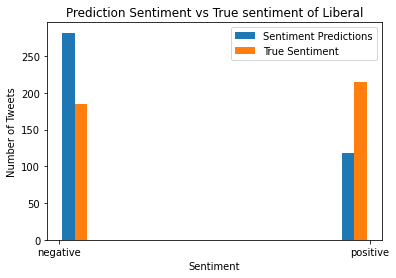

In [57]:
# plot of Liberal
sentiment_prediction = df_election[df_election['political_party'] == 'Liberal']['sentiment prediction'].astype('str')
true_sentiment = df_election[df_election['political_party'] == 'Liberal']['sentiment'].astype('str')
plt.hist([sentiment_prediction, true_sentiment])
plt.title('Prediction Sentiment vs True sentiment of Liberal')
plt.legend(['Sentiment Predictions', 'True Sentiment'])
locs, labels=plt.xticks()
x_ticks = []
new_xticks=['negative','positive']
plt.xticks(locs,new_xticks)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

Plot of the sentiment prediction results and the true sentiment for Conservative:

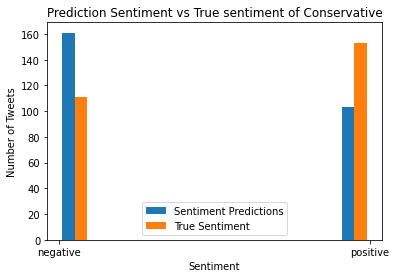

In [58]:
# plot of Conservative
sentiment_prediction = df_election[df_election['political_party'] == 'Conservative']['sentiment prediction'].astype('str')
true_sentiment = df_election[df_election['political_party'] == 'Conservative']['sentiment'].astype('str')
plt.hist([sentiment_prediction, true_sentiment])
plt.title('Prediction Sentiment vs True sentiment of Conservative')
plt.legend(['Sentiment Predictions', 'True Sentiment'])
locs, labels=plt.xticks()
x_ticks = []
new_xticks=['negative','positive']
plt.xticks(locs,new_xticks)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

Plot of the sentiment prediction results and the true sentiment for PPC:

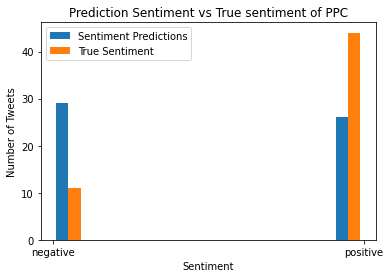

In [59]:
# plot of PPC
sentiment_prediction = df_election[df_election['political_party'] == 'PPC']['sentiment prediction'].astype('str')
true_sentiment = df_election[df_election['political_party'] == 'PPC']['sentiment'].astype('str')
plt.hist([sentiment_prediction, true_sentiment])
plt.title('Prediction Sentiment vs True sentiment of PPC')
plt.legend(['Sentiment Predictions', 'True Sentiment'])
locs, labels=plt.xticks()
x_ticks = []
new_xticks=['negative','positive']
plt.xticks(locs,new_xticks)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

Plot of the sentiment prediction results and the true sentiment for NDP:

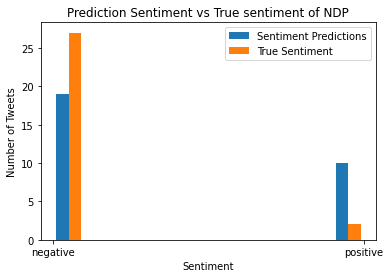

In [60]:
# plot of NDP
sentiment_prediction = df_election[df_election['political_party'] == 'NDP']['sentiment prediction'].astype('str')
true_sentiment = df_election[df_election['political_party'] == 'NDP']['sentiment'].astype('str')
plt.hist([sentiment_prediction, true_sentiment])
plt.title('Prediction Sentiment vs True sentiment of NDP')
plt.legend(['Sentiment Predictions', 'True Sentiment'])
locs, labels=plt.xticks()
x_ticks = []
new_xticks=['negative','positive']
plt.xticks(locs,new_xticks)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

Findings: For the Liberal, Conservative and PPC, the sentiment predictions of negative are all larger than true sentiment, while the sentiment predictions of positive are all smaller than true sentiment. However, in NDP, the sentiment predictions on negative is smaller than true sentiment and the sentiment predictions on positive on positive is larger than true sentiment. In addition, the overall prediction of Liberal and Conservative are quite useful due to higher number of tweets belong to these two parties.

Whether NLP analytics based on tweets is useful for political parties during election campaigns: NLP analytics based on tweets is very useful for political parties during election campaigns, because according to the plots and results shown above, although it is not 100% accurate and bias exists, it correctly predicts the overall trend of the tweets for differnt parties which is closely related to the result of election campaigns.

Explain how each party is viewed in the public eye based on the sentiment value: For Liberal and Conservative, the have both large number of negative and positive, but overall, positive are more than negative. Most people are interested in these two parties, and people support are larger than not support. For PPC, less tweets are discussing it, but since positive is far more than negative, people discuss it tend to show positive support. However, for NDP, the least tweets are discussing it, but among the tweets, negative is a bit more than positive, but since the overall number of tweets related to NDP is small, it might be bias to just say negative based on the plot.

Suggest one way you can improve the accuracy of this model: Perform hyperparameter tuning to find more optimal model. 

##4. Negative Reason Classification - Model implementation and tuning

Split the negative Canadian elections tweets into training data (70%) and test data (30%). Use the true sentiment labels in the Canadian elections data instead of your predictions from the previous part. Choose one algorithms from classification algorithms (choose any model from logistic regression, k-NN, Naive Bayes, SVM, decision trees, RF, XGBoost, deep learning model), train multi-class classification models to predict the reason for the negative tweets. Tune the hyperparameters and chose the model with best score to test your prediction reason for negative sentiment tweets.

a) Provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.

b) Suggest one way you can improve the accuracy of your selected model.

c) Feel free to combine similar reasons into fewer categories as long as you justify your
reasoning. You are free to define input features of your model using word frequency analysis or other techniques.


negative election dataset:

In [61]:
# negative election tweets
df_negative_election=df_election[df_election['sentiment']==0]
df_negative_election.head()

,text,sentiment,negative_reason,political_party,sentiment prediction
0,canadian election power grab pm trudeau yes t...,0,calling election early,Liberal,0
1,hope trudeau loses canadian election tomorrow ...,0,covid,Liberal,0
3,canadian friends never forget trudeau 2 years ...,0,calling election early,Liberal,0
5,vaccines amp guns key election otoole serious ...,0,covid,Conservative,0
6,im sorry moderators respond leadership candida...,0,others,N/A,0


Distribution of negative reasons:

In [62]:
# categories
df_negative_election['negative_reason'].value_counts()

others                                 149
calling election early                  73
tell lies                               61
covid                                   25
economy                                 20
gun control                             16
climate problem                         15
scandal                                 14
healthcare and marijuana                 7
women reproductive right and racism      4
segregation                              3
Name: negative_reason, dtype: int64

Since there are so many reasons, similar reasons are found and grouped into same category to reduce the number of categories based on the steps below:

In [63]:
# scandal is similar to tell lies and are related to trust, so they are combined together and renamed trust 
df_negative_election['negative_reason'].replace(['scandal', 'tell lies'], 'trust', inplace = True) 
df_negative_election['negative_reason'].value_counts()

others                                 149
trust                                   75
calling election early                  73
covid                                   25
economy                                 20
gun control                             16
climate problem                         15
healthcare and marijuana                 7
women reproductive right and racism      4
segregation                              3
Name: negative_reason, dtype: int64

In [64]:
# covid and healthcare and marijuana can be combined to the same category and renamed as covid and health
df_negative_election['negative_reason'].replace(['covid ','healthcare and marijuana'], 'covid and health', inplace = True)
df_negative_election['negative_reason'].value_counts()

others                                 149
trust                                   75
calling election early                  73
covid and health                        32
economy                                 20
gun control                             16
climate problem                         15
women reproductive right and racism      4
segregation                              3
Name: negative_reason, dtype: int64

In [65]:
# gun control, women reproductive right and racism and segregation can be combined in a same category 
# and renamed as safety and human rights
df_negative_election['negative_reason'].replace(['gun control','women reproductive right and racism','segregation'], 
                                                'safety and human rights', inplace = True)

After grouping into fewer categories, the distribution of negative reasons is presented as below:

In [66]:
# categories
df_negative_election['negative_reason'].value_counts()

others                     149
trust                       75
calling election early      73
covid and health            32
safety and human rights     23
economy                     20
climate problem             15
Name: negative_reason, dtype: int64

negative election dataset:

In [67]:
# dataset
df_negative_election.head()

,text,sentiment,negative_reason,political_party,sentiment prediction
0,canadian election power grab pm trudeau yes t...,0,calling election early,Liberal,0
1,hope trudeau loses canadian election tomorrow ...,0,covid and health,Liberal,0
3,canadian friends never forget trudeau 2 years ...,0,calling election early,Liberal,0
5,vaccines amp guns key election otoole serious ...,0,covid and health,Conservative,0
6,im sorry moderators respond leadership candida...,0,others,N/A,0


Split the negative Canadian elections tweets into training data (70%) and test data (30%):

In [68]:
# define X and y
X = df_negative_election['text'].copy()
y = df_negative_election['negative_reason'].copy()

In [69]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

Define input features of the model using bag of words:

In [70]:
# Bag of words to transform x_train
bag_of_words = CountVectorizer(max_features = 500)
X_train_bag_of_words = bag_of_words.fit_transform(X_train)
X_test_bag_of_words = bag_of_words.transform(X_test)

The model choose is SVM(SVC), and below is the training, tuning, best model and accuracy score:

In [71]:
# parameter for grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
 
# fitting the model for grid search
grid.fit(X_train_bag_of_words, y_train)

# best parameter from grid search
print(grid.best_params_)
 
# best model
print(grid.best_estimator_)

# predict on test data
grid_predictions = grid.predict(X_test_bag_of_words)

# accuracy score
score_negative_election_SVM = accuracy_score(y_test,grid_predictions)
print ('Accuracy score of bag of words of SVM on negative election data is',score_negative_election_SVM*100, '%')

# Reference: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
Accuracy score of bag of words of SVM on negative election data is 47.863247863247864 %


Provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets: The model fitted might not be the optimal model, since only SVM is selected and fitted on the training set than test on the test set, maybe the SVM model itself does noit provide good prediction of the data. In addtion, when performing the hyperparameter tuning, only two parameters are tuned over limited numbers of seasrch, which is not very optimal. Furthermore, the dataset is very small and after performing the train test split, the testing set has very small amount of data where bias might exists and reduce the accuracy of prediction. 

Suggest one way you can improve the accuracy of your selected model: To improve the accuracy of the selected model, hyperparameters tuning can be performed on more hyperparameters, and a larger dataset is necessary.